In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
"""Reading the simulations"""

import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/1024/WMAP3.CLUES.HR.001024')
h = s.halos()

In [3]:
vector = (1,2,4)
hh = 0.732
G = 4.299e-6
H0 = 100*hh/1e3

rho_crit = (3*H0**2)/(8*pi*G)
print 'rho_crit=', rho_crit

for i in range(0,3):
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')

    print 'vamos por el halo', '%s'%vector[i]

    xstr=(h1.star['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ystr=(h1.star['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zstr=(h1.star['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    
        
    xgas=(h1.gas['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ygas=(h1.gas['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zgas=(h1.gas['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
    xdrk=(h1.dm['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ydrk=(h1.dm['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zdrk=(h1.dm['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    m_str = h1.star['mass'].in_units('Msol')
    m_gas = h1.gas['mass'].in_units('Msol')
    m_drk = h1.dm['mass'].in_units('Msol')
    
    print '---------------------'

    rtot= concatenate([rstr,rgas,rdrk])

    mtot= concatenate([m_str, m_gas, m_drk])

    rtot_sort =np.sort(rtot)
    rtot_indice = np.argsort(rtot)

    Mc_tot = cumsum(mtot[rtot_indice])
    #Mtot = Mc_tot[-1]
    
# calculo el volumen
    vol = (4/3)*pi*rtot_sort**3
# la densidad
    rho = Mc_tot/vol
# calculo del delta
    delta = rho/rho_crit
# aca hago el corte para los delta cerca de 200
    corte = np.where((delta-200) < 0.0001)
# armo los vectores con ese corte y el r200 es el primero porque como viene en orden me quedo con ese
    dd = delta[corte]
    rr =rtot_sort[corte]
    
    print 'delta=', dd[0], 'r200=', rr[0]
    print rtot_sort

rho_crit= 148.777107863
vamos por el halo 1
---------------------


/z/dalgorry/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in divide


delta= 350.000084745 r200= 148.414680028
[  0.00000000e+00   3.76742757e-03   4.58405886e-03 ...,   2.29547582e+02
   2.29550600e+02   2.29558104e+02]
vamos por el halo 2
---------------------
delta= 349.999356968 r200= 137.256755376
[  0.00000000e+00   4.58405886e-03   4.81112831e-03 ...,   2.06307108e+02
   2.06321441e+02   2.06328063e+02]
vamos por el halo 4
---------------------
delta= 349.99842483 r200= 109.302304597
[  0.00000000e+00   1.12570681e-02   1.17768869e-02 ...,   1.63987941e+02
   1.63993281e+02   1.63999724e+02]


In [4]:
r200 = (189.977454324, 173.656484976, 137.617865798)

print pi

3.14159265359


In [5]:
'''a esto no le des importancia....'''

for r in frange(1, max(rtot), 0.5):
    
        vol = (4/3)*pi*r**3

        limit_tot = np.where(rtot<r)
        rtot_indice = np.argsort(rtot[limit_tot])

        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        Mtot = Mc_tot[-1]
        
        rho = Mtot/vol
        
        delta = rho/rho_crit
        
        #print 'delta =', delta, 'r=', rtot_sort[j]
        
        if (delta-200)<0.1:
            print 'delta=', delta, 'r200=', r
            break
            
'''rho_crit= 148.777107863
vamos por el halo 1
---------------------
delta= 199.94638485 r200= 190.0'''            
        

3.14159265359


In [42]:
x=frange(1, max(rtot), 0.1)
print len(x)

2287


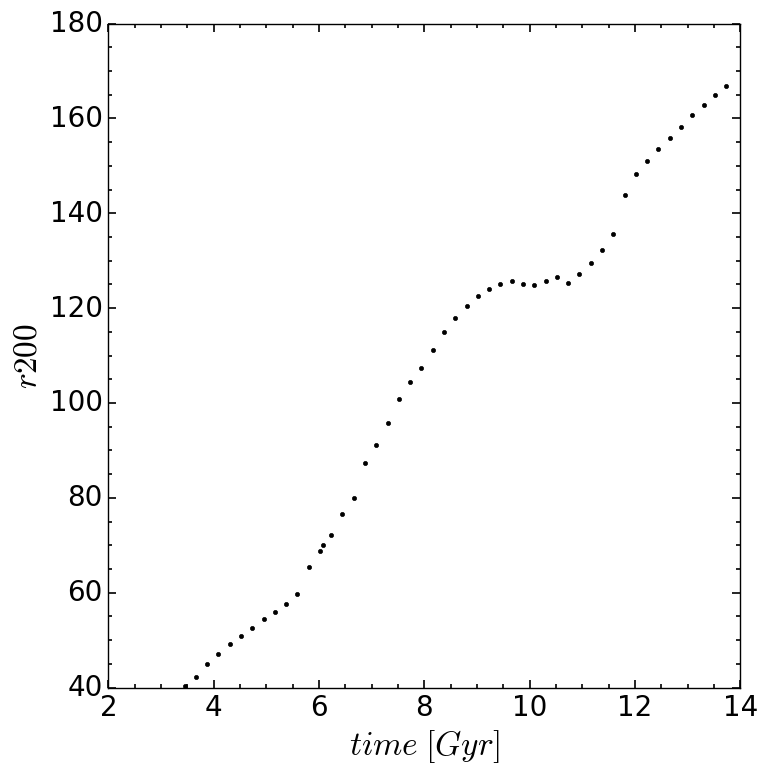

In [2]:
'''aca hice los calculos del r200 que tira la simulacion
el problema con ese r200 es que no se en que unidades esta
no me da la opcion de poner in_units('kpc') asi que nose :/ '''

import matplotlib.pyplot as plt
import pynbody
import h5py

vector=(1,2,4)
snap = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')

for j in range(len(snap)-1, 9,-1):
    #print 'snap', snap[j]
    
    #output_file = h5py.File('../outputs/snap_'+str('%s'%snap[j])+'.h5py', 'a')
   
    s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'+str('%s'%snap[j])+'/WMAP3.CLUES.HR.00'+str('%s'%snap[j]))
    h = s.halos()
    
    for i in range(0,1):
        
        h1 = h[vector[i]]
    
        time = h1.properties['time'].in_units('Gyr')
        aexp = h1.properties['a']
        r200 = h1.properties['Rvir']
        r200 = r200*aexp
        
        fig=plt.figure(i,figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(time,r200,'.k')
        plt.xlabel(u'$time\;[Gyr]$', fontsize=24)
        plt.ylabel(u'$r200$', fontsize=24)
        #plt.ylim(0,200)
        #plt.xlim(0,30)
        ax.minorticks_on()
        ax.tick_params( labelsize=20)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
